<a href="https://colab.research.google.com/github/monishkumaar3/RL/blob/main/RL1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unit 1

In [ ]:
#MDP

import numpy as np
import random

# Grid dimensions and setup
GRID_SIZE = 5
DIRT_REWARD = 1
OBSTACLE_PENALTY = -1

# Actions: Up, Down, Left, Right
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_MAP = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Define the grid environment
class GridEnvironment:
    def __init__(self):
        self.grid = np.zeros((GRID_SIZE, GRID_SIZE))
        self.set_rewards()
        self.robot_pos = (0, 0)

    def set_rewards(self):
        # Randomly set dirt (+1) and obstacles (-1) in the grid
        self.grid[1, 2] = DIRT_REWARD  # Example dirt location
        self.grid[3, 3] = DIRT_REWARD  # Example dirt location
        self.grid[2, 4] = OBSTACLE_PENALTY  # Example obstacle
        self.grid[4, 1] = OBSTACLE_PENALTY  # Example obstacle

    def reset(self):
        self.robot_pos = (0, 0)
        return self.robot_pos

    def is_valid_position(self, pos):
        return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE

    def step(self, action):
        # Calculate new position based on action
        new_pos = (self.robot_pos[0] + ACTION_MAP[action][0],
                   self.robot_pos[1] + ACTION_MAP[action][1])

        # Check if new position is valid
        if self.is_valid_position(new_pos):
            self.robot_pos = new_pos

        reward = self.grid[self.robot_pos]
        return self.robot_pos, reward

    def render(self):
        # Print the current state of the grid
        grid_copy = self.grid.copy()
        grid_copy[self.robot_pos] = 9  # Mark robot's position
        print(grid_copy)

# Define a random policy (no arguments needed)
def random_policy():
    return random.choice(ACTIONS)

# Define a simple greedy policy: Always move towards dirt
def greedy_policy(grid_env):
    row, col = grid_env.robot_pos
    # Define a heuristic: Move towards the closest dirt
    if row < 1:
        return 'down'
    if col < 2:
        return 'right'

    # If no specific heuristic, fall back to a random move
    return random_policy()  # No argument passed


# Simulate the robot using a specific policy
def simulate_robot(grid_env, policy, steps=10):
    grid_env.reset()
    total_reward = 0
    for step in range(steps):
        if policy == random_policy:  # Handle random policy
            action = random_policy()
        else:
            action = policy(grid_env)
        _, reward = grid_env.step(action)
        total_reward += reward
        grid_env.render()
        print(f"Step {step+1}: Action = {action}, Reward = {reward}, Total Reward = {total_reward}")

    print(f"Total reward after {steps} steps: {total_reward}")

# Main function
if __name__ == "__main__":
    grid_env = GridEnvironment()

    print("Simulating random policy:")
    simulate_robot(grid_env, random_policy)

    print("\nSimulating greedy policy:")
    simulate_robot(grid_env, greedy_policy)




Simulating random policy:
[[ 0.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]
Step 1: Action = down, Reward = 0.0, Total Reward = 0.0
[[ 0.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]
Step 2: Action = left, Reward = 0.0, Total Reward = 0.0
[[ 0.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]
Step 3: Action = left, Reward = 0.0, Total Reward = 0.0
[[ 9.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]
Step 4: Action = up, Reward = 0.0, Total Reward = 0.0
[[ 0.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]
Step 5: Action = down, Reward = 0.0, Total Reward = 0.0
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 9.  0.  0.  0. -1.]
 [ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]]


In [ ]:
#policy evaluation algorithm

import numpy as np

# Grid dimensions
GRID_SIZE = 5

# Actions: Up, Down, Left, Right
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_MAP = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Define rewards in the environment
class Warehouse:
    def __init__(self):
        self.grid = np.zeros((GRID_SIZE, GRID_SIZE))
        self.set_rewards()

    def set_rewards(self):
        # Set rewards for specific states
        self.grid[1, 2] = 2  # Item location
        self.grid[3, 3] = 5  # Goal location
        self.grid[2, 4] = -2  # Obstacle location
        self.grid[4, 1] = -2  # Obstacle location

    def is_valid_position(self, pos):
        return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE

    def step(self, state, action):
        # Calculate new position based on action
        new_state = (state[0] + ACTION_MAP[action][0], state[1] + ACTION_MAP[action][1])
        if self.is_valid_position(new_state):
            return new_state, self.grid[new_state]
        else:
            # Invalid action, stay in the same state
            return state, -2  # Penalty for hitting the wall

# Policy evaluation function
def policy_evaluation(policy, env, discount_factor=0.9, theta=1e-6):
    V = np.zeros((GRID_SIZE, GRID_SIZE))  # Initialize value function to zeros
    while True:
        delta = 0
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                v = 0
                state = (i, j)
                for action, action_prob in policy[state].items():
                    next_state, reward = env.step(state, action)
                    v += action_prob * (reward + discount_factor * V[next_state])

                # Calculate the change (delta) between the old value and the new value
                delta = max(delta, np.abs(v - V[state]))
                V[state] = v
        # Stop if the change in value function is below a small threshold (theta)
        if delta < theta:
            break
    return V

# Define a random policy where each action is equally probable
def random_policy():
    policy = {}
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            policy[(i, j)] = {action: 1/4 for action in ACTIONS}
    return policy

# Main function
if __name__ == "__main__":
    # Initialize the environment
    warehouse = Warehouse()

    # Define a random policy
    policy = random_policy()

    # Evaluate the policy
    V = policy_evaluation(policy, warehouse)

    # Display the value function
    print("Value Function for the given policy:")
    print(V)


Value Function for the given policy:
[[-4.40996053 -2.97572531 -2.03298218 -2.88432531 -4.44443894]
 [-3.35973743 -1.58455793 -1.14244569 -1.23525699 -3.53541632]
 [-3.35569062 -1.78679481 -0.22474053 -0.15006713 -2.05340585]
 [-4.18973758 -2.7763224  -0.14176251 -0.48689605 -1.16513777]
 [-6.07708513 -3.99869473 -2.69765323 -0.70701604 -2.58406252]]


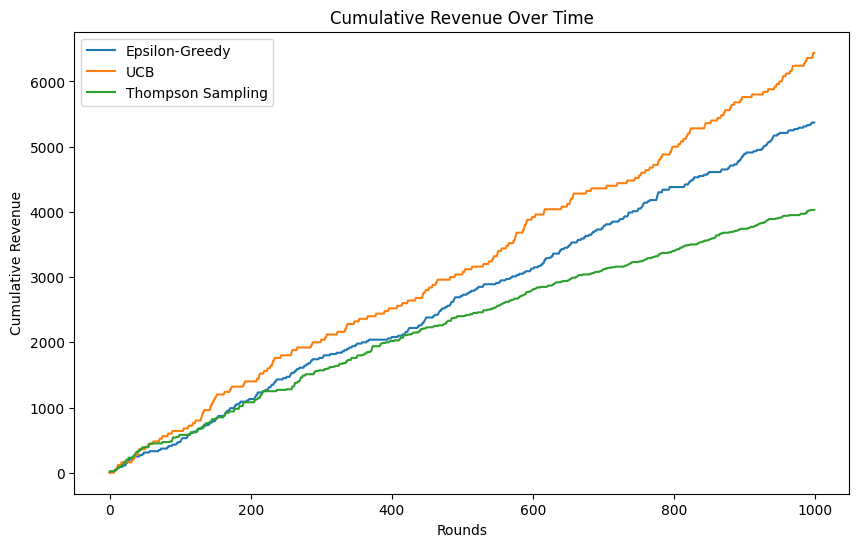

In [ ]:
#epsilongreedyapproach

import numpy as np
import matplotlib.pyplot as plt
import random

# Simulate customer response to price points (arms)
class PricingEnvironment:
    def __init__(self, conversion_rates, price_points):
        self.conversion_rates = conversion_rates  # Probability of purchase at each price
        self.price_points = price_points          # Corresponding price points

    def get_reward(self, price_index):
        # Simulate a customer purchase with the probability of the conversion rate
        conversion = np.random.binomial(1, self.conversion_rates[price_index])
        revenue = conversion * self.price_points[price_index]
        return revenue

# Epsilon-Greedy Strategy
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm was played
        self.values = np.zeros(n_arms)  # Average reward for each arm

    def select_arm(self):
        # Epsilon-Greedy action selection
        if random.random() > self.epsilon:
            return np.argmax(self.values)  # Exploit
        else:
            return random.randint(0, self.n_arms - 1)  # Explore

    def update(self, arm, reward):
        # Update the value estimates
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] = ((n - 1) / n) * self.values[arm] + (1 / n) * reward

# Upper Confidence Bound (UCB) Strategy
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        # Upper Confidence Bound action selection
        if self.total_counts < self.n_arms:
            return self.total_counts  # Play each arm at least once
        confidence_bounds = self.values + np.sqrt(2 * np.log(self.total_counts) / (self.counts + 1e-5))
        return np.argmax(confidence_bounds)

    def update(self, arm, reward):
        # Update the value estimates
        self.counts[arm] += 1
        self.total_counts += 1
        n = self.counts[arm]
        self.values[arm] = ((n - 1) / n) * self.values[arm] + (1 / n) * reward

# Thompson Sampling Strategy
class ThompsonSampling:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.successes = np.zeros(n_arms)
        self.failures = np.zeros(n_arms)

    def select_arm(self):
        # Sample from Beta distribution for each arm
        sampled_theta = np.random.beta(self.successes + 1, self.failures + 1)
        return np.argmax(sampled_theta)

    def update(self, arm, reward):
        # Update the posterior distribution
        if reward > 0:
            self.successes[arm] += 1
        else:
            self.failures[arm] += 1

# Simulation
def simulate(n_rounds, env, strategies):
    rewards = {strategy: np.zeros(n_rounds) for strategy in strategies}

    for t in range(n_rounds):
        for strategy_name, strategy in strategies.items():
            # Select an arm (price point)
            arm = strategy.select_arm()

            # Get the reward (revenue) for the selected arm
            reward = env.get_reward(arm)

            # Update the strategy with the observed reward
            strategy.update(arm, reward)

            # Store the reward for this round
            rewards[strategy_name][t] = reward

    return rewards

# Plot the results
def plot_results(rewards):
    plt.figure(figsize=(10, 6))
    for strategy, reward in rewards.items():
        plt.plot(np.cumsum(reward), label=strategy)
    plt.xlabel('Rounds')
    plt.ylabel('Cumulative Revenue')
    plt.title('Cumulative Revenue Over Time')
    plt.legend()
    plt.show()

# Main function
if __name__ == "__main__":
    # Environment setup: 4 price points with respective conversion rates
    price_points = [10, 20, 30, 40]  # Prices
    conversion_rates = [0.3, 0.25, 0.2, 0.15]  # Probabilities of conversion
    env = PricingEnvironment(conversion_rates, price_points)

    # Initialize strategies
    epsilon_greedy = EpsilonGreedy(n_arms=len(price_points), epsilon=0.1)
    ucb = UCB(n_arms=len(price_points))
    thompson_sampling = ThompsonSampling(n_arms=len(price_points))

    strategies = {
        "Epsilon-Greedy": epsilon_greedy,
        "UCB": ucb,
        "Thompson Sampling": thompson_sampling
    }

    # Simulate pricing decisions over 1000 rounds
    n_rounds = 1000
    rewards = simulate(n_rounds, env, strategies)

    # Plot the cumulative revenue over time
    plot_results(rewards)


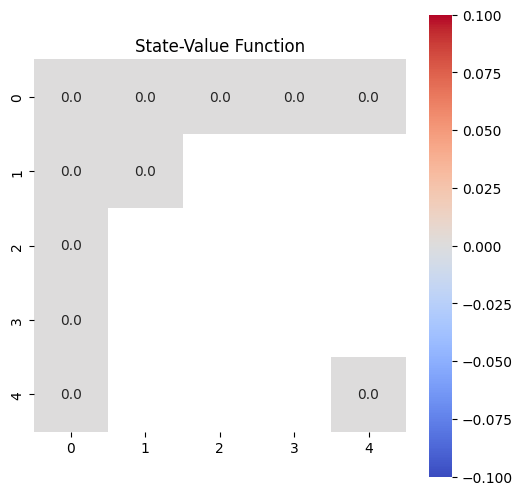

In [ ]:
#bellmanEquation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid environment for the warehouse
class WarehouseEnvironment:
    def __init__(self, rows, cols, delivery_points, obstacles, rewards, gamma=0.9):
        self.rows = rows
        self.cols = cols
        self.grid = np.zeros((rows, cols))  # Grid initialized to zeros
        self.delivery_points = delivery_points  # List of delivery points (goals)
        self.obstacles = obstacles  # List of obstacles
        self.rewards = rewards  # Rewards for certain cells
        self.gamma = gamma  # Discount factor

        for (r, c) in obstacles:
            self.grid[r][c] = None  # Mark obstacle cells as None

        for (r, c), reward in rewards.items():
            self.grid[r][c] = reward  # Assign rewards for specific cells

    def is_valid(self, state):
        r, c = state
        if 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] is not None:
            return True
        return False

    def get_possible_actions(self, state):
        actions = []
        r, c = state
        possible_moves = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]  # Up, down, left, right

        for move in possible_moves:
            if self.is_valid(move):
                actions.append(move)
        return actions

# Bellman update to compute state-value function
def bellman_update(env, policy, value_function, theta=1e-4):
    delta = float('inf')
    rows, cols = env.rows, env.cols

    while delta > theta:
        delta = 0
        for r in range(rows):
            for c in range(cols):
                if (r, c) in env.delivery_points or env.grid[r][c] is None:
                    continue  # Skip delivery points and obstacles

                v = value_function[r, c]
                new_value = 0

                # Bellman equation to update value for state (r, c)
                for action in env.get_possible_actions((r, c)):
                    next_r, next_c = action
                    reward = env.grid[next_r][next_c] if env.grid[next_r][next_c] is not None else 0
                    new_value += policy[(r, c)][action] * (reward + env.gamma * value_function[next_r, next_c])

                value_function[r, c] = new_value
                delta = max(delta, abs(v - new_value))

    return value_function

# Visualize the value function
def visualize_value_function(value_function, title="State-Value Function"):
    plt.figure(figsize=(6, 6))
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, square=True)
    plt.title(title)
    plt.show()

# Main function to simulate the warehouse environment and compute value functions
if __name__ == "__main__":
    rows, cols = 5, 5
    delivery_points = [(4, 4)]  # Goal state
    obstacles = [(2, 2), (3, 2)]
    rewards = {(4, 4): 10, (4, 3): 2}  # Assign rewards (goal state and intermediate state)

    # Create environment
    env = WarehouseEnvironment(rows, cols, delivery_points, obstacles, rewards, gamma=0.9)

    # Initialize policy: Random uniform policy
    policy = {}
    for r in range(rows):
        for c in range(cols):
            if (r, c) not in env.delivery_points and env.grid[r][c] is not None:
                actions = env.get_possible_actions((r, c))
                if actions:
                    prob = 1 / len(actions)
                    policy[(r, c)] = {action: prob for action in actions}

    # Initialize value function to zero
    value_function = np.zeros((rows, cols))

    # Compute the value function using Bellman update
    value_function = bellman_update(env, policy, value_function)

    # Visualize the value function
    visualize_value_function(value_function)


In [ ]:
#maze

import numpy as np
import random

# Define the maze environment
class MazeEnv:
    def __init__(self, maze, start, goal, traps, gamma=0.9):
        """
        Parameters:
        - maze: 2D numpy array representing the maze layout
        - start: tuple representing the start position (row, col)
        - goal: tuple representing the goal position (row, col)
        - traps: list of trap positions [(row, col), ...]
        - gamma: discount factor for future rewards
        """
        self.maze = maze
        self.start = start
        self.goal = goal
        self.traps = traps
        self.gamma = gamma
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self.agent_pos

    def is_terminal(self, pos):
        """Check if the position is terminal (either goal or trap)"""
        return pos == self.goal or pos in self.traps

    def get_reward(self, pos):
        """Return the reward for the given position"""
        if pos == self.goal:
            return 10  # High reward for reaching the goal
        elif pos in self.traps:
            return -10  # Penalty for falling into a trap
        else:
            return 0  # Neutral reward for non-terminal positions

    def step(self, action):
        """Take a step in the maze and return the next state, reward, and if the state is terminal"""
        row, col = self.agent_pos
        if action == 'up':
            row = max(0, row - 1)
        elif action == 'down':
            row = min(len(self.maze) - 1, row + 1)
        elif action == 'left':
            col = max(0, col - 1)
        elif action == 'right':
            col = min(len(self.maze[0]) - 1, col + 1)

        next_pos = (row, col)
        reward = self.get_reward(next_pos)
        self.agent_pos = next_pos
        return next_pos, reward, self.is_terminal(next_pos)

# TD(0) algorithm
def td_zero(env, policy, alpha=0.1, episodes=500):
    """
    Apply TD(0) algorithm to estimate the value function for the given policy.
    Parameters:
    - env: the Maze environment
    - policy: dict mapping states to actions
    - alpha: learning rate
    - episodes: number of episodes to run
    """
    # Initialize the value function
    value_function = { (row, col): 0 for row in range(len(env.maze)) for col in range(len(env.maze[0])) }

    for episode in range(episodes):
        state = env.reset()

        while not env.is_terminal(state):
            action = policy[state]  # Select action according to the given policy
            next_state, reward, done = env.step(action)

            # TD(0) update rule
            value_function[state] += alpha * (reward + env.gamma * value_function[next_state] - value_function[state])

            state = next_state

    return value_function

# Random policy for the agent (for demonstration purposes)
def random_policy(env):
    """Define a random policy"""
    policy = {}
    actions = ['up', 'down', 'left', 'right']
    for row in range(len(env.maze)):
        for col in range(len(env.maze[0])):
            policy[(row, col)] = random.choice(actions)
    return policy

# Main function to run the simulation
if __name__ == "__main__":
    # Define the maze layout (0 is free space, 1 is wall/trap)
    maze = np.array([
        [0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]
    ])

    start = (0, 0)
    goal = (4, 4)
    traps = [(1, 1), (1, 3), (2, 1), (2, 3), (3, 3)]

    # Initialize the environment
    env = MazeEnv(maze, start, goal, traps)

    # Create a random policy
    policy = random_policy(env)

    # Apply TD(0) algorithm to learn the value function
    value_function = td_zero(env, policy)

    # Print the value function
    print("Value Function:")
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            print(f"({row}, {col}): {value_function[(row, col)]:.2f}", end="  ")
        print()


Value Function:
(0, 0): -9.00  (0, 1): 0.00  (0, 2): 0.00  (0, 3): 0.00  (0, 4): 0.00  
(1, 0): -10.00  (1, 1): 0.00  (1, 2): 0.00  (1, 3): 0.00  (1, 4): 0.00  
(2, 0): 0.00  (2, 1): 0.00  (2, 2): 0.00  (2, 3): 0.00  (2, 4): 0.00  
(3, 0): 0.00  (3, 1): 0.00  (3, 2): 0.00  (3, 3): 0.00  (3, 4): 0.00  
(4, 0): 0.00  (4, 1): 0.00  (4, 2): 0.00  (4, 3): 0.00  (4, 4): 0.00  


In [ ]:
#DQN

import numpy as np
import random
import tensorflow as tf
from collections import deque
from tensorflow.keras import layers

# Simulated highway environment (simplified)
class HighwayEnv:
    def __init__(self, n_lanes=3, max_speed=10, road_length=100):
        self.n_lanes = n_lanes
        self.max_speed = max_speed
        self.road_length = road_length
        self.reset()

    def reset(self):
        self.position = [0, 1]  # Start at the beginning, in the middle lane (pos: [distance, lane])
        self.speed = 5  # Start with speed of 5
        self.done = False
        return np.array([self.position[0], self.position[1], self.speed])

    def step(self, action):
        reward = 0
        # Define the action space: 0: accelerate, 1: decelerate, 2: move left, 3: move right
        if action == 0:
            self.speed = min(self.max_speed, self.speed + 1)
        elif action == 1:
            self.speed = max(0, self.speed - 1)
        elif action == 2:
            self.position[1] = max(0, self.position[1] - 1)  # Move left
        elif action == 3:
            self.position[1] = min(self.n_lanes - 1, self.position[1] + 1)  # Move right

        # Update position based on speed
        self.position[0] += self.speed

        # Define reward structure
        if self.position[0] >= self.road_length:
            self.done = True
            reward = 10  # Reaching the end of the road
        elif self.speed == 0:
            reward = -1  # Penalty for stopping
        else:
            reward = self.speed / self.max_speed  # Reward for maintaining a good speed

        # Define collision penalty (going off road)
        if self.position[1] < 0 or self.position[1] >= self.n_lanes:
            self.done = True
            reward = -10  # Collision

        return np.array([self.position[0], self.position[1], self.speed]), reward, self.done

# DQN Model
def build_dqn_model(input_shape, action_space):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(action_space, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = build_dqn_model(input_shape=(state_size,), action_space=action_size)
        self.target_model = build_dqn_model(input_shape=(state_size,), action_space=action_size)
        self.update_target_model()

    def update_target_model(self):
        """Copy weights from the model to the target model"""
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(np.array([state]), verbose=0)
        return np.argmax(q_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(np.array([state]), verbose=0)
            if done:
                target[0][action] = reward
            else:
                next_q_values = self.target_model.predict(np.array([next_state]), verbose=0)
                target[0][action] = reward + self.gamma * np.amax(next_q_values[0])
            self.model.fit(np.array([state]), target, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

# Training the DQN agent
if __name__ == "__main__":
    env = HighwayEnv()
    state_size = 3  # Position (distance, lane) and speed
    action_size = 4  # Four possible actions: accelerate, decelerate, left, right
    agent = DQNAgent(state_size, action_size)
    episodes = 1000
    batch_size = 32

    for e in range(episodes):
        state = env.reset()
        total_reward = 0
        for time_step in range(500):
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done:
                agent.update_target_model()
                print(f"Episode: {e+1}/{episodes}, Total reward: {total_reward}, Epsilon: {agent.epsilon:.2}")
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)

    # Save the trained model
    agent.save("dqn_highway_agent.h5")


In [ ]:
#A2c

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

# Simulated 4-way intersection environment
class IntersectionEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        self.position = (0, 0)  # Starting at the intersection center
        self.speed = 0
        self.traffic_lights = [1, 1, 1, 1]  # 1 for green, 0 for red at four directions
        self.done = False
        self.wait_time = 0
        return self._get_state()

    def _get_state(self):
        return np.array([self.position[0], self.position[1], self.speed] + self.traffic_lights)

    def step(self, action):
        reward = 0

        # Actions: 0 - Stop, 1 - Move forward, 2 - Turn left, 3 - Turn right
        if action == 0:
            self.speed = 0
        elif action == 1:
            if self.traffic_lights[0] == 1:  # Forward only if green light
                self.speed = 1
                reward -= 1  # Reward for minimizing wait time
            else:
                reward -= 10  # Penalty for collision if trying to move when light is red
                self.done = True
        elif action == 2:
            # Turn left logic
            self.position = (self.position[0] - 1, self.position[1])
        elif action == 3:
            # Turn right logic
            self.position = (self.position[0] + 1, self.position[1])

        # Update traffic lights (simple simulation)
        self.traffic_lights = [(x + 1) % 2 for x in self.traffic_lights]

        # End condition (for simplicity, let's end after 100 steps)
        if self.wait_time > 100:
            self.done = True
            reward -= 10  # Penalty for long wait time

        return self._get_state(), reward, self.done

# Actor-Critic Model
class A2C:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005
        self.memory = []
        self.build_model()

    def build_model(self):
        # Actor network
        self.actor = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.state_size,)),
            layers.Dense(24, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_size, activation='softmax')
        ])
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=self.actor_lr)

        # Critic network
        self.critic = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.state_size,)),
            layers.Dense(24, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(1)
        ])
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=self.critic_lr)

    def choose_action(self, state):
        state = np.expand_dims(state, axis=0)
        probs = self.actor.predict(state)[0]
        action = np.random.choice(self.action_size, p=probs)
        return action

    def train(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, axis=0)
        next_state = np.expand_dims(next_state, axis=0)

        # Compute target value
        target = reward
        if not done:
            target += self.gamma * self.critic.predict(next_state)[0]

        # Update critic
        with tf.GradientTape() as tape:
            value = self.critic(state)
            critic_loss = tf.reduce_mean(tf.square(target - value))
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        # Update actor
        with tf.GradientTape() as tape:
            probs = self.actor(state)[0]
            action_prob = probs[action]
            value = self.critic(state)
            advantage = target - value
            actor_loss = -tf.math.log(action_prob) * advantage
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

# Training the A2C agent
if __name__ == "__main__":
    env = IntersectionEnv()
    state_size = len(env._get_state())
    action_size = 4
    agent = A2C(state_size, action_size)

    episodes = 1000
    for e in range(episodes):
        state = env.reset()
        total_reward = 0
        for time_step in range(500):
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.train(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done:
                print(f"Episode: {e+1}/{episodes}, Total reward: {total_reward}")
                break

    print("Training completed.")


In [ ]:
#ppo

import numpy as np

class TrafficIntersectionEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        self.signal_states = [0, 0]  # 0 - red, 1 - green for two directions
        self.traffic_flow = np.random.randint(0, 10, size=2)  # Random initial traffic flow
        self.wait_times = [0, 0]  # Wait times for two directions
        self.done = False
        return self._get_state()

    def _get_state(self):
        return np.array(self.traffic_flow + self.wait_times)

    def step(self, action):
        # Actions: 0 - Keep current signal, 1 - Switch signal
        if action == 1:
            self.signal_states = [1 - state for state in self.signal_states]

        # Update traffic conditions
        self.traffic_flow = np.random.randint(0, 10, size=2)
        self.wait_times = [wt + tf for wt, tf in zip(self.wait_times, self.traffic_flow)]

        # Calculate reward: negative of total wait time
        reward = -sum(self.wait_times)

        # Terminate after a fixed number of steps
        if np.sum(self.wait_times) > 1000:
            self.done = True

        return self._get_state(), reward, self.done


import tensorflow as tf
from tensorflow.keras import layers

class PPOAgent:
    def __init__(self, state_size, action_size, gamma=0.99, epsilon=0.2, lr=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr

        # Build actor and critic networks
        self.actor = self.build_actor()
        self.critic = self.build_critic()
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)

    def build_actor(self):
        model = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.state_size,)),
            layers.Dense(24, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_size, activation='softmax')
        ])
        return model

    def build_critic(self):
        model = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.state_size,)),
            layers.Dense(24, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(1)
        ])
        return model

    def choose_action(self, state):
        state = np.expand_dims(state, axis=0)
        probs = self.actor.predict(state)[0]
        action = np.random.choice(self.action_size, p=probs)
        return action

    def train(self, states, actions, rewards, next_states, dones):
        states = np.array(states)
        next_states = np.array(next_states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones)

        # Compute target values for critic
        targets = rewards + (1 - dones) * self.gamma * np.squeeze(self.critic.predict(next_states))

        # Train critic
        with tf.GradientTape() as tape:
            values = tf.squeeze(self.critic(states))
            critic_loss = tf.reduce_mean(tf.square(targets - values))
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        # Train actor
        with tf.GradientTape() as tape:
            probs = self.actor(states)
            actions_one_hot = tf.one_hot(actions, self.action_size)
            action_probs = tf.reduce_sum(probs * actions_one_hot, axis=1)
            values = tf.squeeze(self.critic(states))
            advantages = targets - values
            ratios = action_probs / (tf.squeeze(self.actor(states)) + 1e-10)
            clipped_ratios = tf.clip_by_value(ratios, 1 - self.epsilon, 1 + self.epsilon)
            actor_loss = -tf.reduce_mean(tf.minimum(ratios * advantages, clipped_ratios * advantages))
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))


def train_ppo_agent(env, agent, episodes=1000):
    for e in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        states, actions, rewards, next_states, dones = [], [], [], [], []

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            next_states.append(next_state)
            dones.append(done)
            state = next_state
            total_reward += reward

        # Train PPO agent
        agent.train(states, actions, rewards, next_states, dones)
        print(f"Episode: {e+1}/{episodes}, Total reward: {total_reward}")

    print("Training completed.")

# Create environment and PPO agent
env = TrafficIntersectionEnv()
state_size = len(env._get_state())
action_size = 2
ppo_agent = PPOAgent(state_size, action_size)

# Train the PPO agent
train_ppo_agent(env, ppo_agent)


In [ ]:
#reinforce

import numpy as np

class TradingEnv:
    def __init__(self, data):
        self.data = data  # Historical prices
        self.n = len(data)
        self.reset()

    def reset(self):
        self.current_step = 0
        self.done = False
        self.position = 0  # 0 - no position, 1 - holding
        self.cash = 1000  # Initial cash
        self.asset = 0    # Initial asset
        self.total_value = self.cash  # Total value = cash + asset * price
        return self._get_state()

    def _get_state(self):
        # State: [current price, cash, asset, position]
        price = self.data[self.current_step]
        return np.array([price, self.cash, self.asset, self.position])

    def step(self, action):
        price = self.data[self.current_step]
        reward = 0

        if action == 0:  # Buy
            if self.position == 0 and self.cash >= price:
                self.position = 1
                self.asset = self.cash / price
                self.cash = 0
        elif action == 1:  # Sell
            if self.position == 1:
                self.cash = self.asset * price
                self.asset = 0
                self.position = 0
        elif action == 2:  # Hold
            pass

        self.current_step += 1
        if self.current_step >= self.n:
            self.done = True

        self.total_value = self.cash + self.asset * price
        reward = self.total_value - 1000  # Reward: change in total value from initial

        return self._get_state(), reward, self.done


import tensorflow as tf
from tensorflow.keras import layers

class REINFORCEAgent:
    def __init__(self, state_size, action_size, lr=0.001, gamma=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.lr = lr
        self.model = self._build_model()
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.states = []
        self.actions = []
        self.rewards = []

    def _build_model(self):
        model = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.state_size,)),
            layers.Dense(24, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_size, activation='softmax')
        ])
        return model

    def choose_action(self, state):
        state = np.expand_dims(state, axis=0)
        probs = self.model.predict(state)[0]
        action = np.random.choice(self.action_size, p=probs)
        return action

    def store_transition(self, state, action, reward):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)

    def train(self):
        # Convert rewards to numpy array and compute cumulative rewards
        rewards = np.array(self.rewards)
        discounted_rewards = np.zeros_like(rewards)
        cumulative = 0
        for t in reversed(range(len(rewards))):
            cumulative = cumulative * self.gamma + rewards[t]
            discounted_rewards[t] = cumulative

        # Normalize rewards
        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)

        # Train the policy network
        with tf.GradientTape() as tape:
            states = np.array(self.states)
            actions = np.array(self.actions)
            probs = self.model(states)
            action_probs = tf.reduce_sum(probs * tf.one_hot(actions, self.action_size), axis=1)
            loss = -tf.reduce_mean(tf.math.log(action_probs) * discounted_rewards)

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

        # Clear memory
        self.states = []
        self.actions = []
        self.rewards = []

import matplotlib.pyplot as plt

def train_reinforce_agent(env, agent, episodes=100):
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.store_transition(state, action, reward)
            state = next_state
            total_reward += reward

        agent.train()
        print(f"Episode: {episode+1}/{episodes}, Total reward: {total_reward}")

# Generate some synthetic historical price data
np.random.seed(0)
price_data = np.cumsum(np.random.randn(1000) * 2 + 0.5)

# Create environment and agent
env = TradingEnv(price_data)
state_size = len(env._get_state())
action_size = 3
agent = REINFORCEAgent(state_size, action_size)

# Train the REINFORCE agent
train_reinforce_agent(env, agent)

# Evaluate the performance
# (Evaluation can be done by testing on new data or analyzing performance metrics)


UNIT IV

Consider a robotic arm tasked with reaching a target position in 3D space. Implement an
analytic gradient computation approach to optimize the control policy of the robotic arm
using model-based RL. Write a Python script to simulate the robotic arm's motion and
demonstrate the optimization process.

In [ ]:
import numpy as np

# Robotic arm parameters
l1, l2 = 1.0, 1.0  # Length of the two arm segments

# Forward kinematics to get the end-effector position
def forward_kinematics(theta1, theta2):
    x = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
    y = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)
    return np.array([x, y])

# Compute the loss (distance between the end-effector and target position)
def loss_function(target, current):
    return np.linalg.norm(target - current)

# Gradient of the loss with respect to the angles (theta1, theta2)
def compute_gradient(theta1, theta2, target):
    epsilon = 1e-6
    current_pos = forward_kinematics(theta1, theta2)

    # Numerical gradients
    grad_theta1 = (loss_function(target, forward_kinematics(theta1 + epsilon, theta2)) -
                   loss_function(target, current_pos)) / epsilon
    grad_theta2 = (loss_function(target, forward_kinematics(theta1, theta2 + epsilon)) -
                   loss_function(target, current_pos)) / epsilon

    return np.array([grad_theta1, grad_theta2])

# Gradient descent to update angles
def gradient_descent(theta1, theta2, target, learning_rate=0.01, steps=100):
    for _ in range(steps):
        grad = compute_gradient(theta1, theta2, target)
        theta1 -= learning_rate * grad[0]
        theta2 -= learning_rate * grad[1]

        # Update current position
        current_pos = forward_kinematics(theta1, theta2)
        print(f"Step: {_}, Loss: {loss_function(target, current_pos):.4f}, Position: {current_pos}")

    return theta1, theta2

# Target position (desired position for the end-effector)
target_position = np.array([1.5, 1.5])

# Initial angles
theta1, theta2 = np.pi / 4, np.pi / 4

# Optimize the angles to reach the target position
theta1_opt, theta2_opt = gradient_descent(theta1, theta2, target_position)
